In [61]:
from scipy import misc, sparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
sparse

<module 'scipy.sparse' from '/home/raph/.conda/envs/socmed/lib/python3.6/site-packages/scipy/sparse/__init__.py'>

In [3]:
dataset = pd.read_csv("dataset/tile_placements.csv")

In [4]:
dataset.head()

,ts,user,x_coordinate,y_coordinate,color
0,1491167838000,c2Md9m4QckH8M+lhNh9btgoiFDk=,326,258,0
1,1491171651000,5KjCuLCk/VTXBIgaszopYecZ3uU=,190,791,0
2,1491105072000,toyjOAoAZMtlGZ3hXm5/LYsi+iA=,1,753,0
3,1491235861000,TGENUMJ6VmaBRr8ae9yP0MWQ66g=,233,931,0
4,1491163179000,usR8PLvN90gdivTbszEqhvPcXI4=,526,663,0


In [5]:
hash_to_idx = {}

for idx, hash_ in enumerate(dataset['user'].unique()):
    hash_to_idx[hash_] = idx

In [6]:
dataset['user_idx'] = dataset['user'].map(lambda x: hash_to_idx[x])
dataset['x'] = dataset['x_coordinate']
dataset['y'] = dataset['y_coordinate']
dataset['coords'] = dataset['x']*1001 + dataset['y']

In [7]:
num_users = dataset['user'].nunique()
num_color = dataset['color'].nunique()

In [8]:
num_rows = dataset['x'].nunique()
num_columns = dataset['y'].nunique()

In [31]:
type(np.zeros((16)))

numpy.ndarray

In [79]:
X = sparse.dok_matrix((num_users, num_rows*num_columns))
X[0, 132] = 1
X[0, 132]

1.0

In [18]:
dataset.groupby('user').size().describe(percentiles=[.25,.5,.75,.99,.999])

count    1.166924e+06
mean     1.419107e+01
std      2.993160e+01
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.300000e+01
99%      1.500000e+02
99.9%    2.930000e+02
max      6.560000e+02
dtype: float64

In [19]:
dataset.groupby('color').size()

color
0     2582906
1      313116
2      338469
3     3813015
4      714052
5     2270392
6      816257
7      304828
8     1102581
9      261911
10     768434
11     421738
12     346915
13    1882948
14     201128
15     421207
dtype: int64

In [ ]:
colors = np.array([(255, 255, 255),
 (228, 228, 228),
 (136, 136, 136),
 (34, 34, 34),
 (255, 167, 209),
 (229, 0, 0),
 (229, 149, 0),
 (160, 106, 66),
 (229, 217, 0),
 (148, 224, 68),
 (2, 190, 1),
 (0, 229, 240),
 (0, 131, 199),
 (0, 0, 234),
 (224, 74, 255),
 (130, 0, 128)])

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

In [59]:
estimates = np.zeros((num_rows,num_columns,16))
weights = np.ones(num_users)
weights_old = np.zeros(num_users)

In [56]:
def estimate():
    global estimates
    #for _, user_idx, x, y, color in dataset[['user_idx', 'x', 'y', 'color']].itertuples():
    for user_idx, x, y, color in dataset[['user_idx', 'x', 'y', 'color']].values:
        estimates[x, y, color] += weights[user_idx]
    estimates /= weights.sum()
def maximize():
    global weights, estimates
    for user_idx, x, y, color in dataset[['user_idx', 'x', 'y', 'color']].values:
        weights[user_idx] += np.argmax(estimates[x, y]) == color
    weights /= num_rows*num_columns

1166915.5274859264


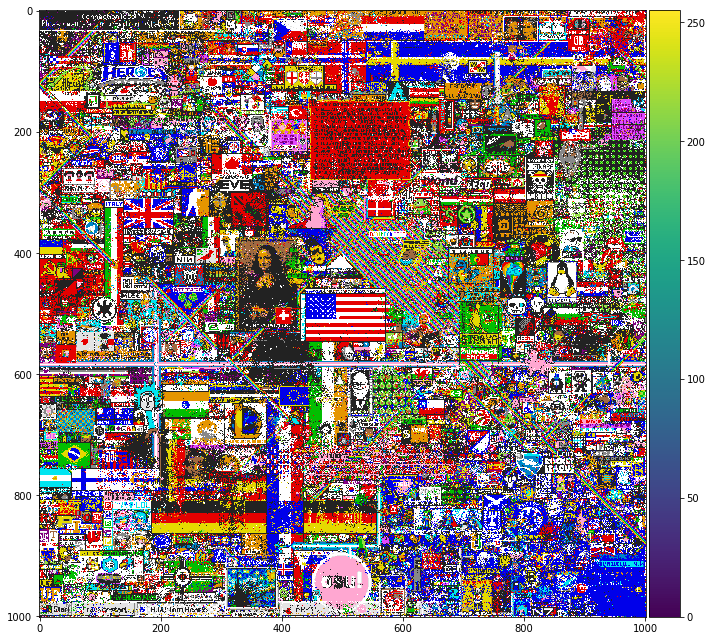

In [60]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

1166913.9740239782
2.135669847632567


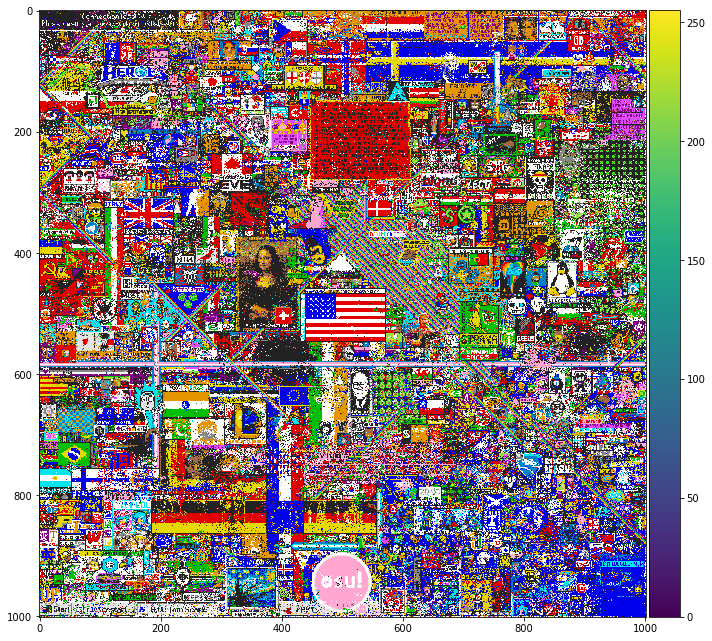

In [62]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

2.135669847632567
0.3016602591990232


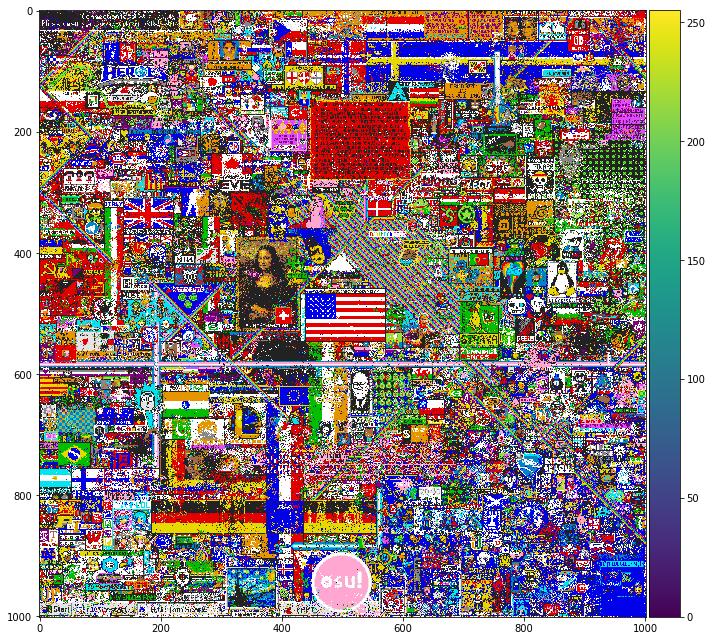

In [63]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

0.3016602591990232
0.12374665161826093


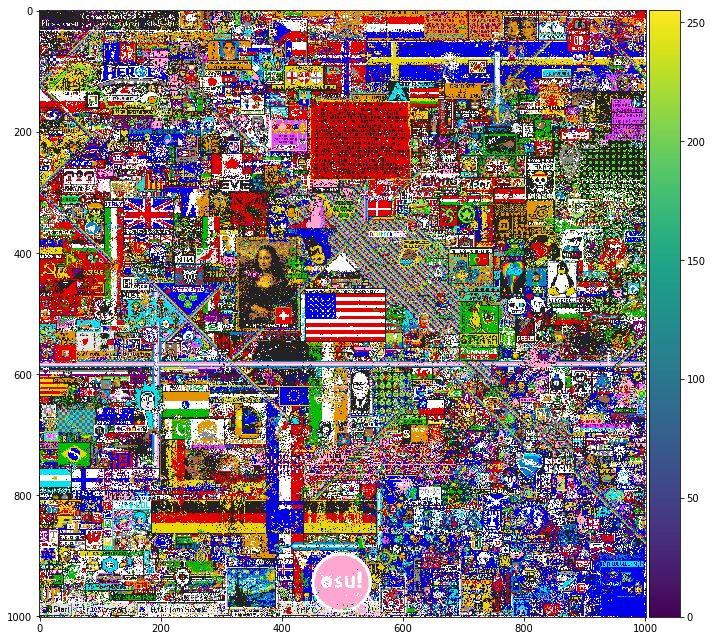

In [64]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

0.12374665161826093
0.0588034496905188


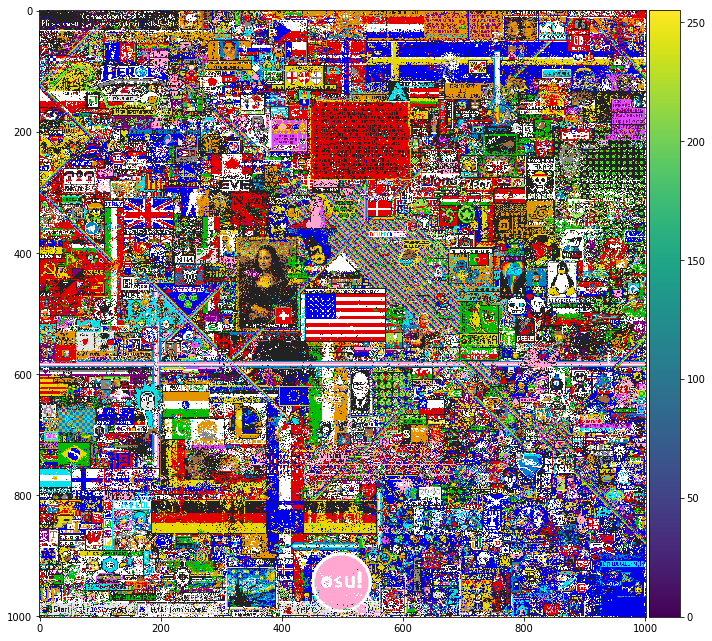

In [65]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

0.0588034496905188
0.031428168198562194


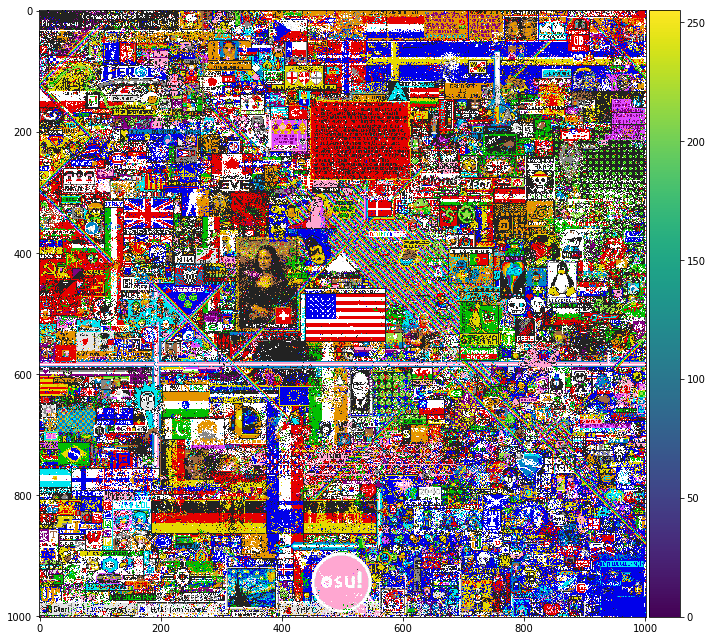

In [66]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));

0.031428168198562194
0.019023963319879652


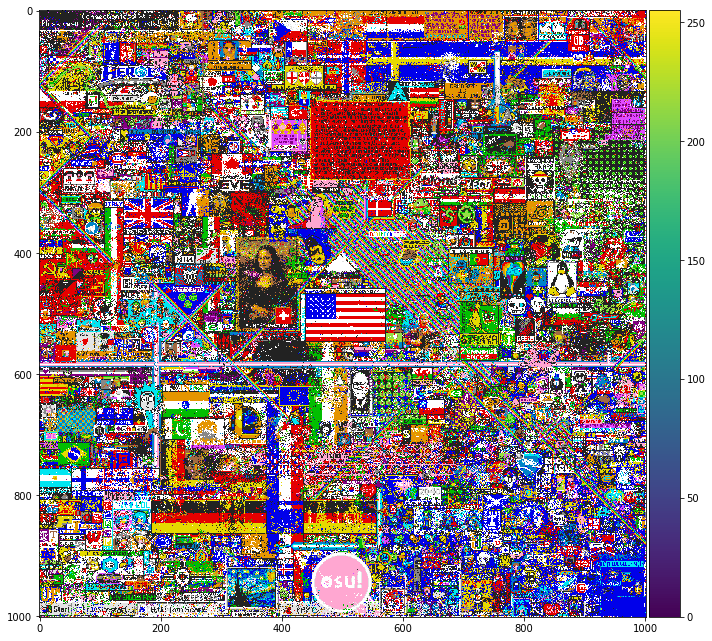

In [67]:
print(np.abs(weights_old - weights).sum())
weights_old = weights.copy()
estimate()
maximize()
print(np.abs(weights_old - weights).sum())

image = np.zeros((num_rows, num_columns, 3), dtype=np.int64)
best_estimates = estimates.argmax(axis=2)
for row in range(num_rows):
    for column in range(num_columns):
        image[row, column] = colors[best_estimates[row, column]]
from skimage import io
plt.figure(figsize=(10,10))
io.imshow(image.transpose(1,0,2));